# GUI class

In [1]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import tkinter.font as tkFont
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pickle

with open('city_area_road.pkl', 'rb') as f:
    data1 = {"縣市": ''}
    data2 = pickle.load(f)
    data = {}
    data.update(data1)
    data.update(data2)

selected_list = [[], [], []]

class Design(tk.Frame):
    def __int__(self):
        tk.Frame.__int__(self)
        self.grid()

    def Drop_down_list(self, title, title_row):
        self.title_row = title_row
        labelTop = tk.Label(cal, text = title)
        labelTop.grid(column = 0, row = title_row)
        self.City = ttk.Combobox(cal, values = list(data.keys()))
        self.City.grid(column = 1, row = title_row)
        self.City.current(0)
        self.Region = ttk.Combobox(cal, values = ["鄉鎮區"])
        self.Region.grid(column = 2, row = title_row)
        self.Region.current(0)
        self.City.bind("<<ComboboxSelected>>", self.Chosen)

    def Chosen(self, city):
        self.var_Selected = self.City.get()
        self.Region = ttk.Combobox(cal, values = list(data[self.var_Selected].keys()))
        self.Region.grid(column = 2, row = self.title_row)
        self.Region.current(0)
        self.Region.bind("<<ComboboxSelected>>", self.Saved)

    def Saved(self, event):
        selected_city = self.City.get()
        selected_region = self.Region.get()
        if selected_list[self.title_row] == []:
            selected_list[self.title_row] = [selected_city, selected_region]
        else:
            selected_list[self.title_row][0] = selected_city
            selected_list[self.title_row][1] = selected_region
         
    def update_scrollregion(self, event):
        self.Canvas.configure(scrollregion=self.Canvas.bbox("all"))

    def Search(self):
        print(selected_list)
        pic = draw(selected_list)
        
        # 建立Frame、Canvas及Canvasframe
        self.Frame = tk.Frame(cal, width=1275, height=590, bg="white")
        self.Frame.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
        self.Frame.rowconfigure(0, weight=1) 
        self.Frame.columnconfigure(0, weight=1)
        
        self.Canvas = tk.Canvas(self.Frame, width=1275, height=590, bg="white")
        self.Canvas.grid(row=3, column=0, columnspan = 2000, sticky="nsew")
        
        self.CanvasFrame = tk.Frame(self.Canvas, width=1275, height=590, bg="white")
        self.Canvas.create_window(0, 0, window=self.CanvasFrame, anchor='nw')

        # 最上方數字呈現
        f1 = tkFont.Font(family='microsoft yahei', size=16, weight='bold')
        f2 = tkFont.Font(family='microsoft yahei', size=12, weight='bold')
        f3 = tkFont.Font(family='microsoft yahei', size=40, weight='bold')
        
        self.bus_label = tk.Label(self.CanvasFrame, text='公車站牌密度(個/平方公里)', font = f1, bg = "white")
        self.bus_label.grid(column = 1, row = 3, columnspan = 3, sticky="nsew")
        
        self.bus_label_Region1 = tk.Label(self.CanvasFrame, text=selected_list[0][1], font = f2, bg = "white")
        self.bus_label_Region1.grid(column = 1, row = 4, sticky="nsew")
        self.bus_label_Region2 = tk.Label(self.CanvasFrame, text=selected_list[1][1], font = f2, bg = "white")
        self.bus_label_Region2.grid(column = 2, row = 4, sticky="nsew")
        self.bus_label_Region3 = tk.Label(self.CanvasFrame, text=selected_list[2][1], font = f2, bg = "white")
        self.bus_label_Region3.grid(column = 3, row = 4, sticky="nsew")
        
        self.bus_number_Region1 = tk.Label(self.CanvasFrame, text='10', font = f3, bg = "white")
        self.bus_number_Region1.grid(column = 1, row = 5, sticky="nsew")
        self.bus_number_Region2 = tk.Label(self.CanvasFrame, text='20', font = f3, bg = "white")
        self.bus_number_Region2.grid(column = 2, row = 5, sticky="nsew")
        self.bus_number_Region3 = tk.Label(self.CanvasFrame, text='30', font = f3, bg = "white")
        self.bus_number_Region3.grid(column = 3, row = 5, sticky="nsew")
        
        self.clinic_label = tk.Label(self.CanvasFrame, text='人均診所家數(千分之一)', font = f1, bg = "white")
        self.clinic_label.grid(column = 5, row = 3, columnspan = 3, sticky="nsew")
        
        self.clinic_label_Region1 = tk.Label(self.CanvasFrame, text=selected_list[0][1], font = f2, bg = "white")
        self.clinic_label_Region1.grid(column = 5, row = 4, sticky="nsew")
        self.clinic_label_Region2 = tk.Label(self.CanvasFrame, text=selected_list[1][1], font = f2, bg = "white")
        self.clinic_label_Region2.grid(column = 6, row = 4, sticky="nsew")
        self.clinic_label_Region3 = tk.Label(self.CanvasFrame, text=selected_list[2][1], font = f2, bg = "white")
        self.clinic_label_Region3.grid(column = 7, row = 4, sticky="nsew")

        self.clinic_number_Region1 = tk.Label(self.CanvasFrame, text='5', font = f3, bg = "white")
        self.clinic_number_Region1.grid(column = 5, row = 5, sticky="nsew")
        self.clinic_number_Region2 = tk.Label(self.CanvasFrame, text='10', font = f3, bg = "white")
        self.clinic_number_Region2.grid(column = 6, row = 5, sticky="nsew")
        self.clinic_number_Region3 = tk.Label(self.CanvasFrame, text='15', font = f3, bg = "white")
        self.clinic_number_Region3.grid(column = 7, row = 5, sticky="nsew")
        
        # 畫圖
        one = FigureCanvasTkAgg(pic.income_pic(), self.CanvasFrame)
        one.get_tk_widget().grid(column = 1, row = 7, columnspan = 3)
        
        two = FigureCanvasTkAgg(pic.clinic_pic(), self.CanvasFrame)
        two.get_tk_widget().grid(column = 5, row = 7, columnspan = 3)
        
        three = FigureCanvasTkAgg(pic.entertainment_pic(), self.CanvasFrame) 
        three.get_tk_widget().grid(column = 1, row = 9, columnspan = 3)
    
        four = FigureCanvasTkAgg(pic.crime_pic(), self.CanvasFrame)
        four.get_tk_widget().grid(column = 5, row = 9, columnspan = 3)

        five = FigureCanvasTkAgg(pic.school_pic(), self.CanvasFrame)
        five.get_tk_widget().grid(column = 1, row = 11, columnspan = 3)
        
        six = FigureCanvasTkAgg(pic.air_pic(), self.CanvasFrame)
        six.get_tk_widget().grid(column = 5, row = 11, columnspan = 3)
    
        # 建立下拉捲軸
        self.Scroll = tk.Scrollbar(self.Frame, orient=tk.VERTICAL)
        self.Scroll.config(command=self.Canvas.yview)
        self.Canvas.config(yscrollcommand=self.Scroll.set)
        self.Scroll.grid(row=3, column=1, sticky="ns")
        self.CanvasFrame.bind("<Configure>", self.update_scrollregion)




# 繪圖 class

In [2]:
class draw():
    
    def __init__(self,lists):
        self.cities = [lists[0][0], lists[1][0],lists[2][0]]          # 處理傳入的lists
        self.regions = [lists[0][1],lists[1][1],lists[2][1]]
        
        self.income_data =  pd.read_csv('平均家庭收入.csv')    
        self.clinic_data = pd.read_csv('醫療資源.csv')
        self.entertainment_data = pd.read_csv('娛樂.csv')
        self.market_data = pd.read_csv('超市家數.csv')
        self.crime_data = pd.read_csv('犯罪率.csv')
        self.school_data = pd.read_csv('學校數量.csv')
        self.air_data = pd.read_csv('air_pollution.csv')
        
       
    def income_pic (self):
        city_list = list(set(self.cities)) + ['臺灣地區']
        F = plt.figure(figsize = (5,5), dpi = 100)
        x = self.income_data['年份']
        for city in city_list:
            y = self.income_data[city]
            plt.plot(x,y, marker = 'o',label = city)
        plt.title('年收入')
        plt.legend()
        return F


    def clinic_pic(self):
        clinic = ['診所家數', '大醫院家數'] 
        F = plt.figure(figsize=(5,5), dpi=100)
        no1 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[0]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[0])][clinic]
        x_all = list(range(0, len(clinic)))
        y1 = no1.values.flatten()
        no2 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[1]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[1])][clinic]
        y2 = no2 .values.flatten()
        no3 = self.clinic_data[(self.clinic_data.loc[:,'地區名'] ==  self.regions[2]) & (self.clinic_data.loc[:,'縣市名'] == self.cities[2])][clinic]
        y3 = no3.values.flatten()

        width = 0.25   #先設定每個長條的寬度
        
        plt.barh([i-width for i in x_all], y1, height=width, label= (self.cities[0]+self.regions[0])) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.barh([i for i in x_all], y2, height=width, label=(self.cities[1]+self.regions[1]))        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.barh([i+width for i in x_all], y3, height=width, label=(self.cities[2]+self.regions[2]))
        plt.yticks(x_all,clinic,rotation = 270)
        plt.legend()
        plt.title('醫院診所')
        return F


    def entertainment_pic (self):      
        entertainment = ['電影院', '百貨','全聯','頂好','好市多'] 
        F = plt.figure(figsize=(5,5), dpi=100)
        x_all = list(range(0, len(entertainment)))
        no1 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[0]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[0])][entertainment]
        y1 = no1.values.flatten()
        no2 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[1]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[1])][entertainment]
        y2 = no2 .values.flatten()
        no3 = self.entertainment_data[(self.entertainment_data.loc[:,'地區名'] == self.regions[2]) & (self.entertainment_data.loc[:,'縣市名'] == self.cities[2])][entertainment]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0])) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]))        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]))
        plt.xticks(x_all,entertainment, rotation = 90)
        plt.legend()
        plt.title('百貨&電影院&超市數目')
        return F
        

    def crime_pic (self):
        crime = ['竊盜犯罪率','強制性交犯罪率','強盜犯罪率','搶奪犯罪率']
        ticks_name = ['竊盜','強制性交','強盜','搶奪']
        F = plt.figure(figsize=(5,5), dpi=100)
        x_all = list(range(0, len(crime )))
        no1 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[0]) & (self.crime_data.loc[:,'縣市名'] == self.cities[0])][crime]
        y1 = no1.values.flatten()
        no2 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[1]) & (self.crime_data.loc[:,'縣市名'] == self.cities[1])][crime]
        y2 = no2 .values.flatten()
        no3 = self.crime_data[(self.crime_data.loc[:,'地區名'] == self.regions[2]) & (self.crime_data.loc[:,'縣市名'] == self.cities[2])][crime]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0])) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]))        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]))
        plt.xticks(x_all,ticks_name)
        plt.legend()
        plt.title('犯罪率（三年加總）')
        return F
        

    def school_pic (self):
        school =['幼稚園數量', '國小數量', '國中數量', '高中數量', '大學數量']
        F = plt.figure(figsize=(5,5), dpi=100)
        x_all = list(range(0, len(school)))
        no1 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[0]) & (self.school_data.loc[:,'縣市名'] == self.cities[0])][school]
        y1 = no1.values.flatten()
        no2 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[1]) & (self.school_data.loc[:,'縣市名'] == self.cities[1])][school]
        y2 = no2 .values.flatten()
        no3 = self.school_data[(self.school_data.loc[:,'地區名'] == self.regions[2]) & (self.school_data.loc[:,'縣市名'] == self.cities[2])][school]
        y3 = no3.values.flatten()
        
        width = 0.25   #先設定每個長條的寬度
        plt.bar([i-width for i in x_all], y1, width=width, label= (self.cities[0]+self.regions[0])) #注意這裡的X軸座標為x1中的數據減去寬度的一半
        plt.bar([i for i in x_all], y2, width=width, label=(self.cities[1]+self.regions[1]))        #注意這裡的X軸座標為x1中的數據加上寬度的一半
        plt.bar([i+width for i in x_all], y3, width=width, label=(self.cities[2]+self.regions[2]))
        plt.xticks(x_all,school)
        plt.legend()
        plt.title('各級學校數目')
        return F
       

    def air_pic (self):
        F = plt.figure(figsize=(5,5), dpi=100)
        no1 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[0]) & (self.air_data.loc[:,'縣市名'] == self.cities[0])]['PM 2.5']
        x1 = list(range(0, 11))
        y1 = no1.values.flatten()
        no2 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[1]) & (self.air_data.loc[:,'縣市名'] == self.cities[1])]['PM 2.5']
        y2 = no2 .values.flatten()
        no3 = self.air_data[(self.air_data.loc[:,'地區名'] == self.regions[2]) & (self.air_data.loc[:,'縣市名'] == self.cities[2])]['PM 2.5']
        y3 = no3.values.flatten()
        
        plt.plot(x1,y1, marker = 'o', label = self.cities[0] + self.regions[0])
        plt.plot(x1,y2, marker = 'o', label = self.cities[1] + self.regions[1])
        plt.plot(x1,y3, marker = 'o', label = self.cities[2] + self.regions[2])
        date = [('2019/'+str(x)) for x in range(1,12)]
        plt.xticks(x1,date, rotation = 45)
        plt.title('空氣品質')
        plt.legend()
        return F



# 主程式區

[['宜蘭縣', '頭城鎮'], ['連江縣', '東引鄉'], ['連江縣', '北竿鄉']]


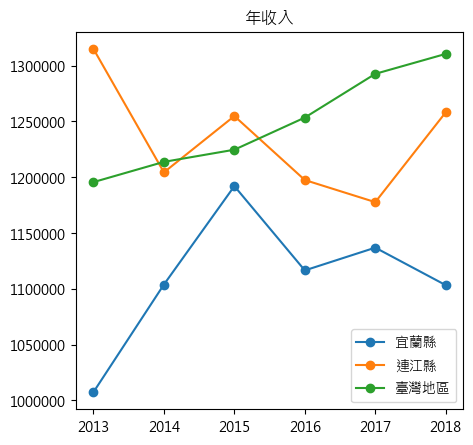

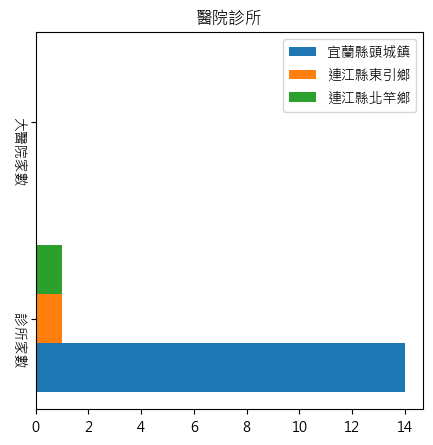

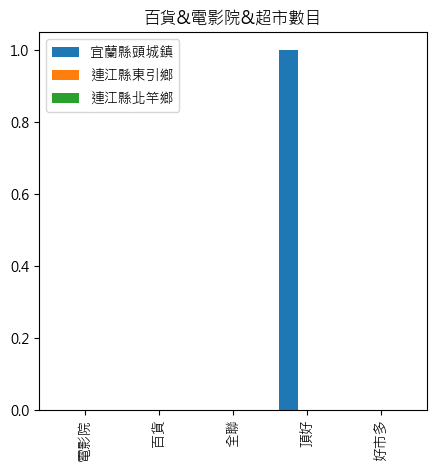

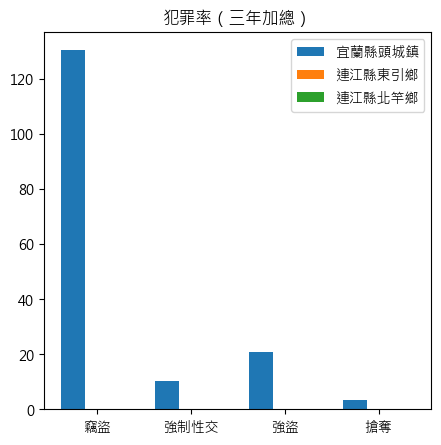

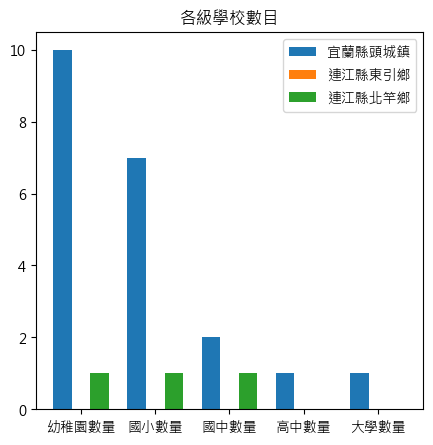

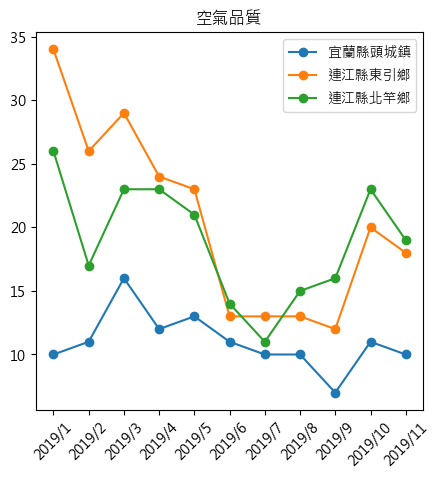

In [10]:
# GUI頁面建立
cal = tk.Tk()
cal.title("南波灣住區生活品質檢測")
cal.geometry('1000x500')

# 下拉式選單建立
Design().Drop_down_list("所選地區  : ", 0)
Design().Drop_down_list("比較地區1 : ", 1)
Design().Drop_down_list("比較地區2 : ", 2)

# 搜尋按鈕建立
button = tk.Button(cal, text = "搜尋", bg = "lightblue", command = Design().Search)
button.grid(column = 3, row = 0, rowspan = 3)

cal.mainloop()